In [2]:
library("ggplot2")
library("dplyr",warn.conflicts=FALSE)
library("lubridate",warn.conflicts=FALSE)
set.seed(1234)

## R exercises
# Set n# 4

### Exercise 1

Community Mobility Reports have been created with the aim to provide insights into what has changed in response to policies aimed at combating COVID-19. Data can be found at https://www.google.com/covid19/mobility/


Download and analyze the following data sets:
- https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv
and
- https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip


The data show how visitors to (or time spent in) categorized places change compared to baseline days. A baseline day represents a normal value for that day of the week. The baseline day is the median value from the 5-week period Jan 3 – Feb 6, 2020. To make the reports useful, categories have been used to group some of the places with similar characteristics for purposes of social distancing guidance. The following categories are available:

- `retail_and_recreation`, i.e. places like restaurants,cafes, shopping centers, theme parks,museums,
libraries, and movie theaters
- `grocery_and_pharmacy`, i.e. grocery markets, food warehouses, farmers markets, specialty
food shops, drug stores, and pharmacies
- `parks`, i.e. national parks, public beaches, marinas, dog parks, plazas,and public gardens
- `transit_stations` i.e. all public transport hubs such as subway, bus, and train stations
- `workplaces`, i.e. places of work
- `residential`, i.e. people’s residence

Select a couple of European countries of your choice and analyze the trends in the previous
variables over time:

produce a plot of the data by averaging the observable over a period of one week (hint: convert the data field to `lubridate::week`) and one month and quantify the impact of COVID-19 restrictions on mobility sitations.

#### Ex
We will briefly analyze the <a href='https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip'> Italian regional report database </a> for a couple of different regions (smaller sized db). First we load the database into a R dataframe, and compute a "week" and a "region" column from the date column using `lubridate` package.

In [3]:
df <- as_tibble(read.csv("2022_IT_Region_Mobility_Report.csv") )
df$date <- as.Date(df$date,,format="%Y-%m-%d")
df$week <- week(df$date)
df$month <- month(df$date)

In [4]:
# sub_region_1 is the region
# sub_region_2 is the district (provincia)

df_em <- subset(df,sub_region_1 == "Emilia-Romagna")
head(df_em,20)


country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,week,month
<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<lgl>,<chr>,<date>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
IT,Italy,Emilia-Romagna,,NA,IT-45,NA,ChIJ3YXzRny1KhMRoHy6_AubBwE,2022-01-01,-70,-84,-4,-52,-72,16,1,1
IT,Italy,Emilia-Romagna,,NA,IT-45,NA,ChIJ3YXzRny1KhMRoHy6_AubBwE,2022-01-02,-29,3,29,-18,-15,5,1,1
IT,Italy,Emilia-Romagna,,NA,IT-45,NA,ChIJ3YXzRny1KhMRoHy6_AubBwE,2022-01-03,-21,25,-2,-37,-42,14,1,1
IT,Italy,Emilia-Romagna,,NA,IT-45,NA,ChIJ3YXzRny1KhMRoHy6_AubBwE,2022-01-04,-20,28,10,-40,-43,15,1,1
IT,Italy,Emilia-Romagna,,NA,IT-45,NA,ChIJ3YXzRny1KhMRoHy6_AubBwE,2022-01-05,-17,37,-1,-39,-43,14,1,1
IT,Italy,Emilia-Romagna,,NA,IT-45,NA,ChIJ3YXzRny1KhMRoHy6_AubBwE,2022-01-06,-38,-34,17,-53,-81,28,1,1
IT,Italy,Emilia-Romagna,,NA,IT-45,NA,ChIJ3YXzRny1KhMRoHy6_AubBwE,2022-01-07,-22,30,18,-39,-47,18,1,1
IT,Italy,Emilia-Romagna,,NA,IT-45,NA,ChIJ3YXzRny1KhMRoHy6_AubBwE,2022-01-08,-27,11,6,-33,-25,10,2,1
IT,Italy,Emilia-Romagna,,NA,IT-45,NA,ChIJ3YXzRny1KhMRoHy6_AubBwE,2022-01-09,-46,-12,-43,-42,-18,11,2,1


So now all that's left to do is a simple `group by` operation followed by a mean over the selected feature.

In [5]:
em_week <- df_em %>% group_by(week) %>% summarize(mean_parks = mean(parks_percent_change_from_baseline))
em_week

week,mean_parks
<dbl>,<dbl>
1,20.5428571
2,-2.4285714
3,6.3285714
4,-0.2428571
5,23.8571429
6,24.9857143
7,20.0142857
8,35.5285714
9,32.8714286


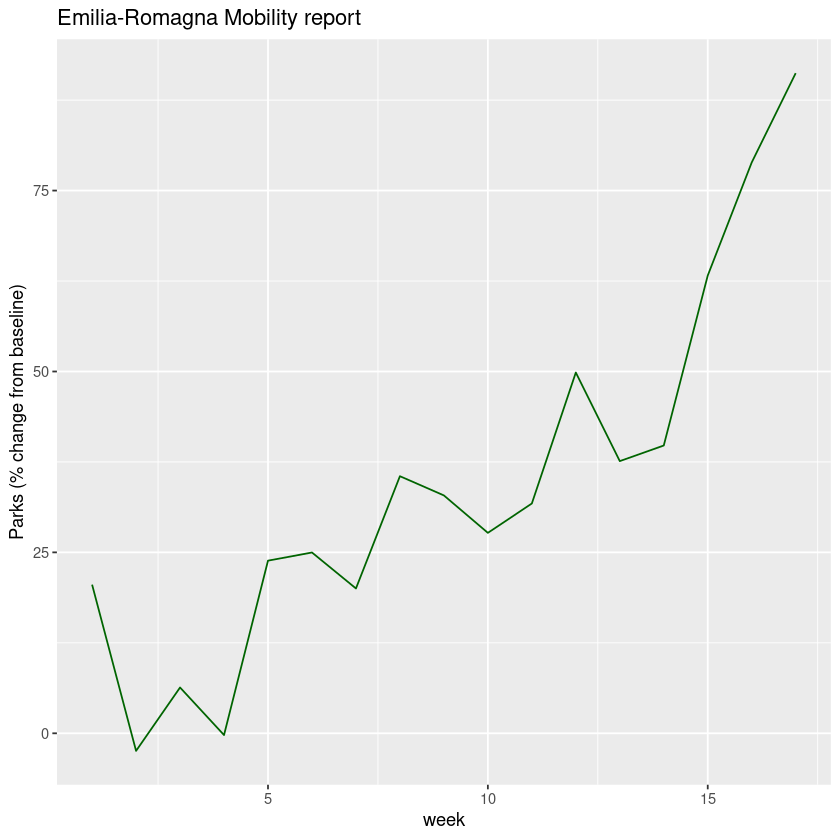

In [6]:
p1 <- ggplot(em_week,aes(x=week,y=mean_parks)) + geom_line(color='darkgreen') + labs(y='Parks (% change from baseline)',title='Emilia-Romagna Mobility report')
p1

Let's do the same for another region:

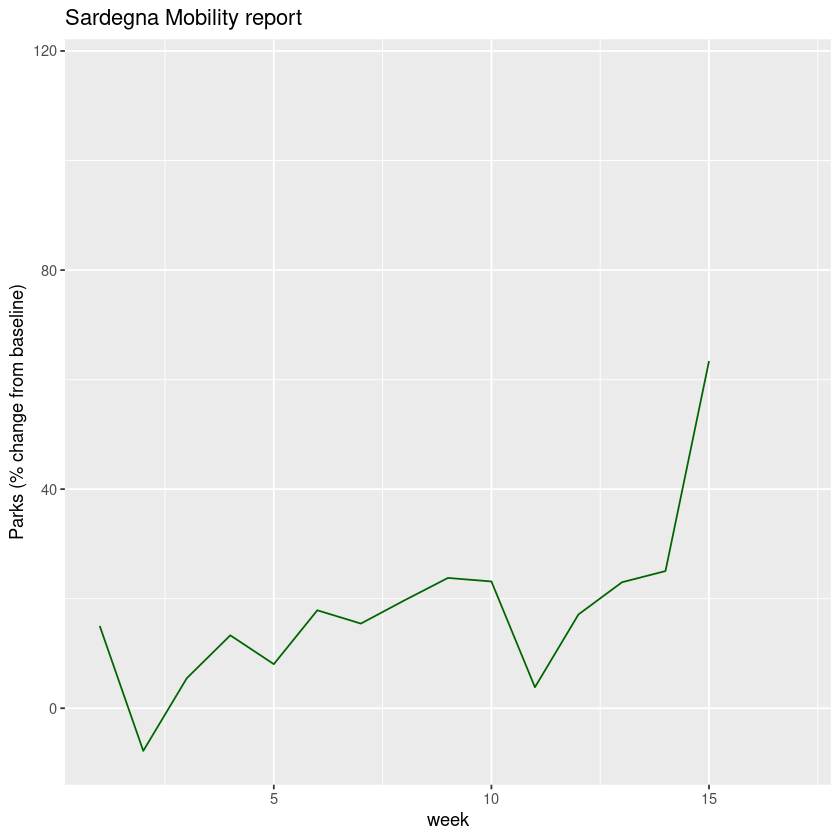

In [7]:
df_sar <- subset(df,sub_region_1 == "Sardinia")
sar_week <- df_sar %>% group_by(week) %>% summarize(mean_parks = mean(parks_percent_change_from_baseline))
p2 <- ggplot(sar_week,aes(x=week,y=mean_parks)) + geom_line(color='darkgreen') + labs(y='Parks (% change from baseline)',title='Sardegna Mobility report')
p2

Finally, let's average over the whole month:

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


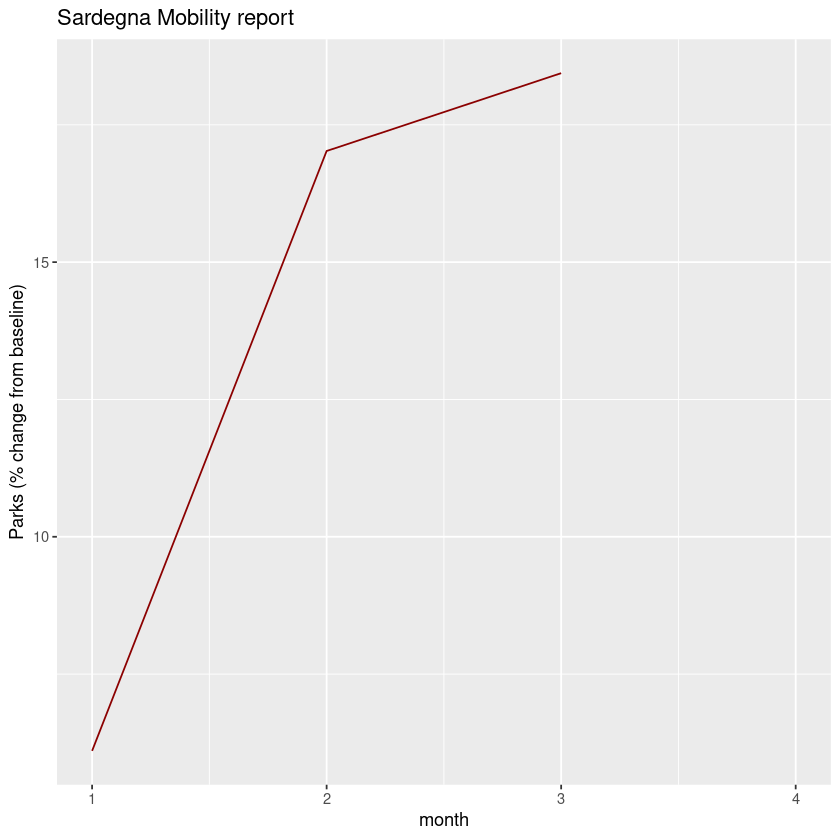

In [8]:
sar_week <- df_sar %>% group_by(month) %>% summarize(mean_parks = mean(parks_percent_change_from_baseline))
p2 <- ggplot(sar_week,aes(x=month,y=mean_parks)) + geom_line(color='darkred') + labs(y='Parks (% change from baseline)',title='Sardegna Mobility report')
p2

### Exercise 2

- one of the first random number generator was proposed by von Neumann, the so-called
_middle square_ algorithm
- write R code to implement this type of generator and, given a fixed digit number input,
square it an remove the leading and trailing digits, in order to return a number with the
same number of digits as the original number
- Suggestion : after having squared the number, convert it to a list of characters
(`number <- unlist(strsplit(as.character(x.squared),""))`)
and, after having removed the head and tail of the list, convert it back to a number
(`as.numeric(paste(number.after.trimming, collapse=""))`)

In [9]:
middle_square <- function(seed) {
    n <- nchar(as.character(seed))
    if (n%%2 != 0) {
        stop("Number of digits needs to be even")
    }
    
    seedsqrd <- unlist(strsplit(as.character(seed**2),""))
    if (length(seedsqrd) < 2*n) { # pad with zeroes
        for (i in 1:(2*n-length(seedsqrd))) {
            seedsqrd <- append(seedsqrd,0)
        }
    }
    # the n central digits of a 2n digits number are the digits from
    # n/2 to 3/2 n
    trimmed <- seedsqrd[(n/2 + 1):(3*(n/2))]
    return(as.numeric(paste(trimmed,collapse="")))

}

middle_square(3456)

[1] 9439

### Exercise 3

A publishing company has recently launched a new journal. In order to determine how effective it is in reaching its possible audience, a market survey company selects a random sample of people from a possible target audience and interviews them. Out of 150 interviewed people, 29 have read the last issue of the journal. 

a. What kind of distribution would you assume for y, the number of people that have seen the last issue of the journal ?

b. Assuming a uniform prior, what is the posterior distribution for y ?

c. Plot both posterior and likelihood ditributions functions

a. _What kind of distribution would you assume for y, the number of people that have seen the last issue of the journal ?_

Every person either read the article or didn't; I expect $y$, i.e. the number of people out of $n$ interviewed, who read the last issue of the journal for a binomial distribution $M \rightarrow P_n (y) = {n \choose y} p^y (1-p)^{n-y}$. The unknown parameter we are trying to estimate is $p$: the underlying probability of generating a "success".


b. _Assuming a uniform prior, what is the posterior distribution for y?_

We need to estimate the probability of the given parameter $p$ of the probability distribution for $y$ via Bayes theorem, given the observed sample of $r=29$ people out who read the article out of $n=150$:

$$
P(p|r,n,M) = \frac{P(r|p,n,M)P(p|M)}{P(r|n,M)}
$$

Assuming a uniform prior means assuming $P(p|M) \sim \mathcal{U}(0,1)$, so the posterior is only proportional to the distribution $P(r|p,n,M)$. The normalization factor $P(r|n,M)$ is determined by the probability of observing the evidence given any possible value of $p$, i.e. $P(r|n,M) = \int_0^1  P(r|p,n,M)P(p|M)dp$. Explicitating every term:

$$
P(r|p,n,M) = {n \choose r} p^r (1-p)^{n-r} \\
P(p|M) = 1 \\
P(r|n,M) = \int_0^1 {n \choose r} p^r (1-p)^{n-r} dp \\
P(p|r,n,M) = \frac{p^r (1-p)^{n-r}}{\int_0^1 p'^r (1-p')^{n-r} dp'} = \frac{(n+1)!}{r!(n-r)!}  p^r (1-p)^{n-r}
$$

Where in the last equation the normalization integral was computed analytically by parts.


c. _Plot both posterior and likelihood distribution functions._

In our case, assuming a uniform prior, the posterior distirbution for $p$ is simply proportional to the likelihood $P(r|p,n,M)$:

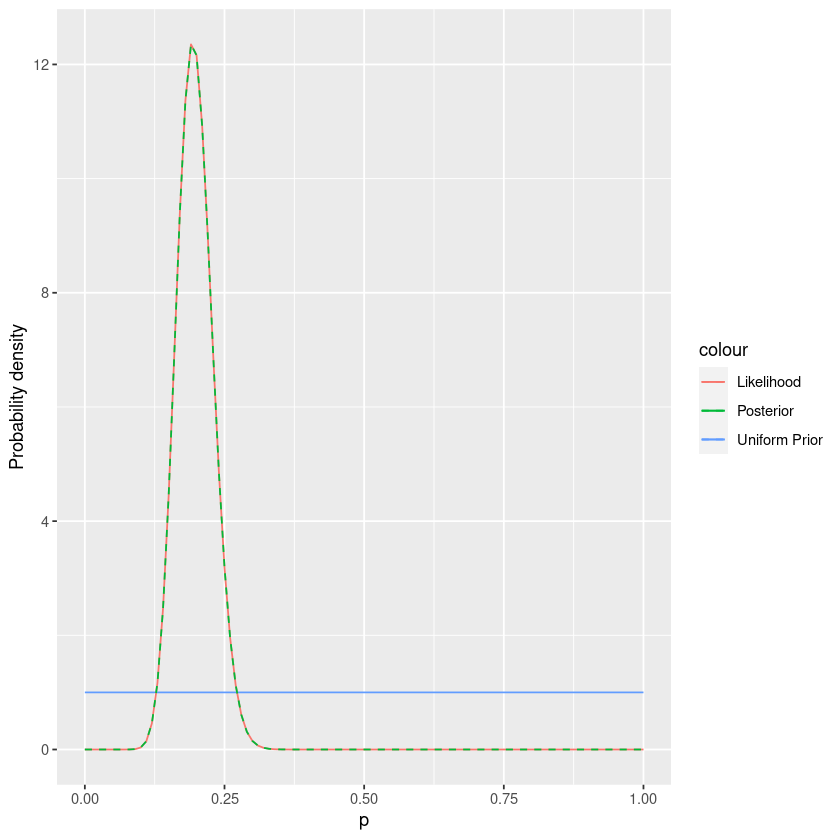

In [10]:
likelihood_norm <- function(p,r,n) {
    z <- factorial(n+1)/(factorial(r)*factorial(n-r)) 
    return(z*(p^r)*(1-p)^(n-r))
}

n <- 150
r <- 29

plot <- ggplot() + xlim(0,1) + geom_function(fun=dunif,aes(col='Uniform Prior')) + geom_function(fun=likelihood_norm,args=c(r,n),aes(col='Likelihood')) + geom_function(fun=likelihood_norm,linetype="dashed",args=c(r,n),aes(col='Posterior'))
plot <- plot + labs(y="Probability density",x='p')
plot

### Exercise 4

A coin is flipped n = 30 times with the following outcomes:
`T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H,
T, H, H, H`

a. Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions
for the data set.

b. Evaluate the most probable value for the coin probability p and, integrating the posterior
probability distribution, give an estimate for a 95% credibility interval.

c. Repeat the same analysis assuming a sequential analysis of the data. Show how the most
probable value and the credibility interval change as a function of the number of coin
tosses (i.e. from 1 to 30).

d. Do you get a different result, by analyzing the data sequentially with respect to a one-step
analysis (i.e. considering all the data as a whole) ?

a. _Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions
for the data set._

The coin toss experiment again follows a binomial distribution, and the parameter we are estimating is again the probability of success $p$.

#### Uniform prior

Assuming a flat prior, the posterior distirbution for $p$ is again directly proportional to the likelihood of obtaining $r$ heads over $n$ tosses:

$$
P(p|r,n,M) =\frac{(n+1)!}{r!(n-r)!}  p^r (1-p)^{n-r}
$$

In [11]:
# little script to grab n and r from data
x <- "T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H"
x <- unlist(strsplit(gsub(" ", "", x, fixed = TRUE),","))
n <- length(x)
r <- length(x[x=="H"])

We can just call again the previous function and plot it:

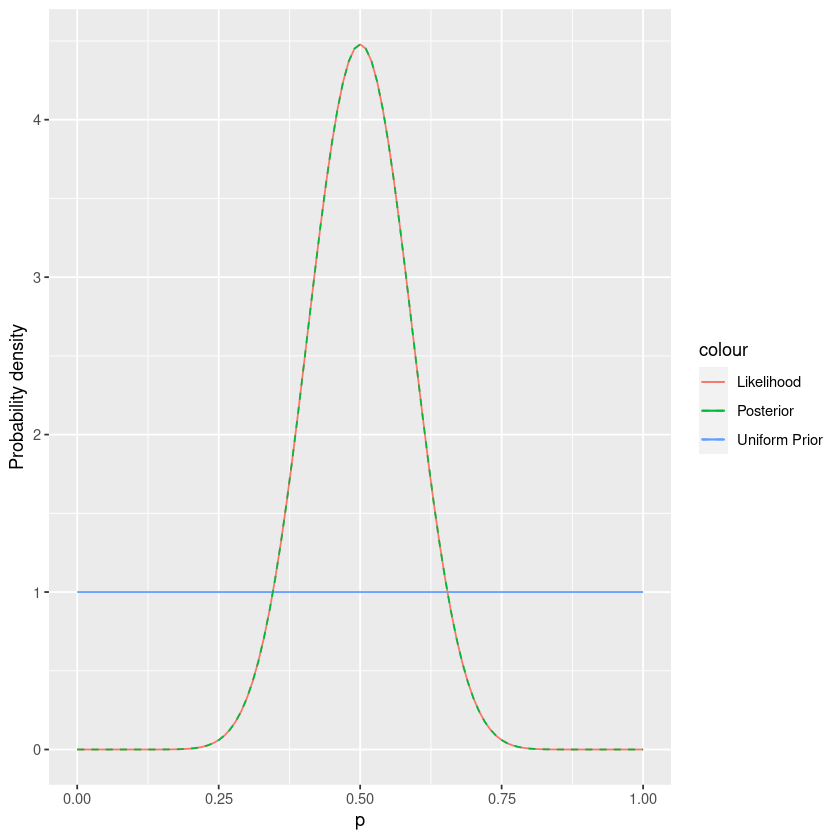

In [12]:
plot <- ggplot() + xlim(0,1) + geom_function(fun=dunif,aes(col='Uniform Prior')) + geom_function(fun=likelihood_norm,args=c(r,n),aes(col='Likelihood')) + geom_function(fun=likelihood_norm,linetype="dashed",args=c(r,n),aes(col='Posterior'))
plot <- plot + labs(y="Probability density",x='p')
plot

#### Beta prior

When assuming a beta prior, we define 

$$
P(p|M) = \frac{1}{B(\alpha,\beta)} p^{\alpha-1} (1-p)^{\beta -1}
$$

Assuming $\alpha = \beta$ means stating a belief about the coin being somewhat fair, since the distribution becomes symmetric around $p=0.5$ for such parameters:


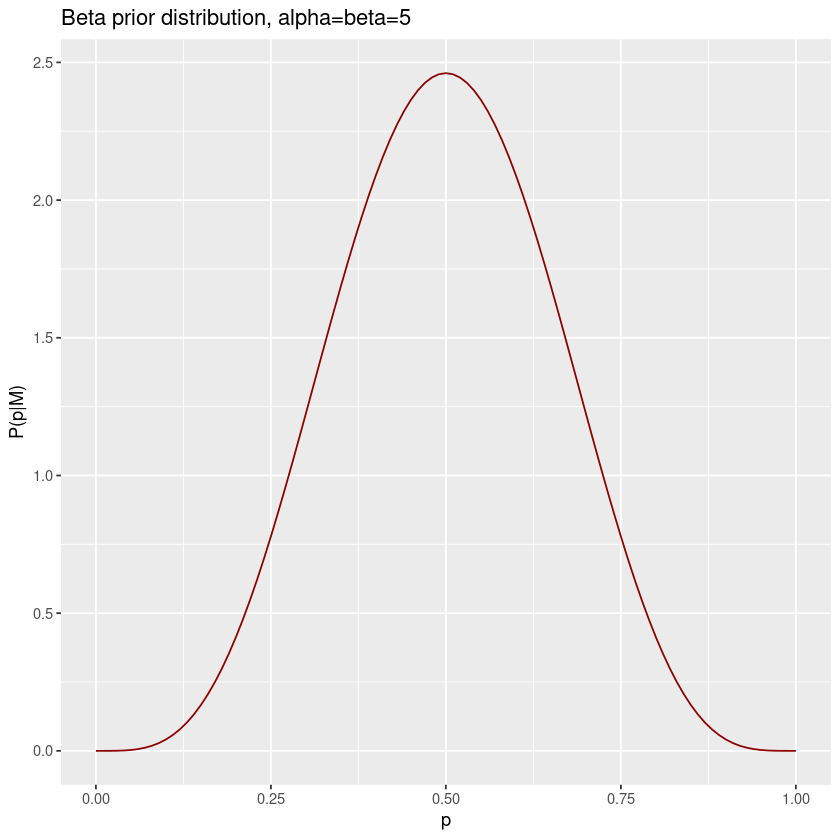

In [21]:
alpha <- 5
beta <- 5

plot_beta <- ggplot() + geom_function(fun=dbeta,args=c(alpha,beta),color='darkred') + xlim(0,1) + labs(title="Beta prior distribution, alpha=beta=5",y="P(p|M)",x="p")
plot_beta

Now the posterior distribution is proportional to the product of the likelihood (given by the binomial distribution) and this prior:
$$
P(p|r,n,M) = \frac{1}{Z}  p^{r + \alpha - 1} (1-p)^{n-r+\beta -1}
$$
with $Z=B(r+\alpha,n-r+\beta)$ being the normalization.

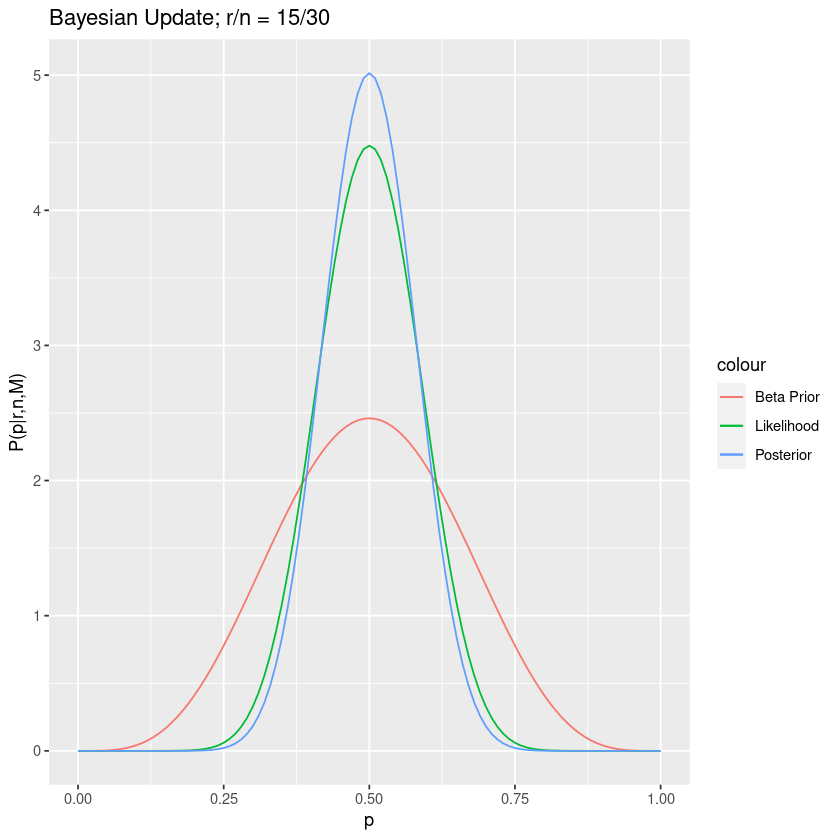

In [35]:
plot <- ggplot() + geom_function(fun=dbeta,args=c(alpha,beta),aes(color='Beta Prior')) # beta distribution
plot <- plot + geom_function(fun=likelihood_norm,args=c(r,n),aes(color='Likelihood')) # likelihood as in binomial distribution
plot <- plot + geom_function(fun=dbeta,args=c(r+alpha,n-r+beta),aes(color='Posterior')) # posterior, is again a beta distribution
plot <- plot + xlim(0,1) + labs(title=sprintf("Bayesian Update; r/n = %s/%s",r,n),x="p",y="P(p|r,n,M)")
plot

b. _Evaluate the most probable value for the coin probability p and, integrating the posterior
probability distribution, give an estimate for a 95% credibility interval._

The most probable value for $p$ is given by the maximum value of our posterior distribution; in a beta distribution, the mode is given by $(\alpha -1)/(\alpha + \beta -2)$, so for our posterior it will be $p_{max} = (r+\alpha -1)/(\alpha + n  + \beta - 2)$

In [55]:
p_max <- function(r,n,alpha,beta) {
    return((r+alpha-1)/(alpha+n+beta-2))
}

In order to define a $95\%$ credibility interval, we will evenly split the remaining $5\%$ of the distribution between its tails; that is, we will use the quantile function to calculate $x_1 : P(x<x_1) = 2.5\%$ and $x_2 : P(x>x_2) = 97.5\%$

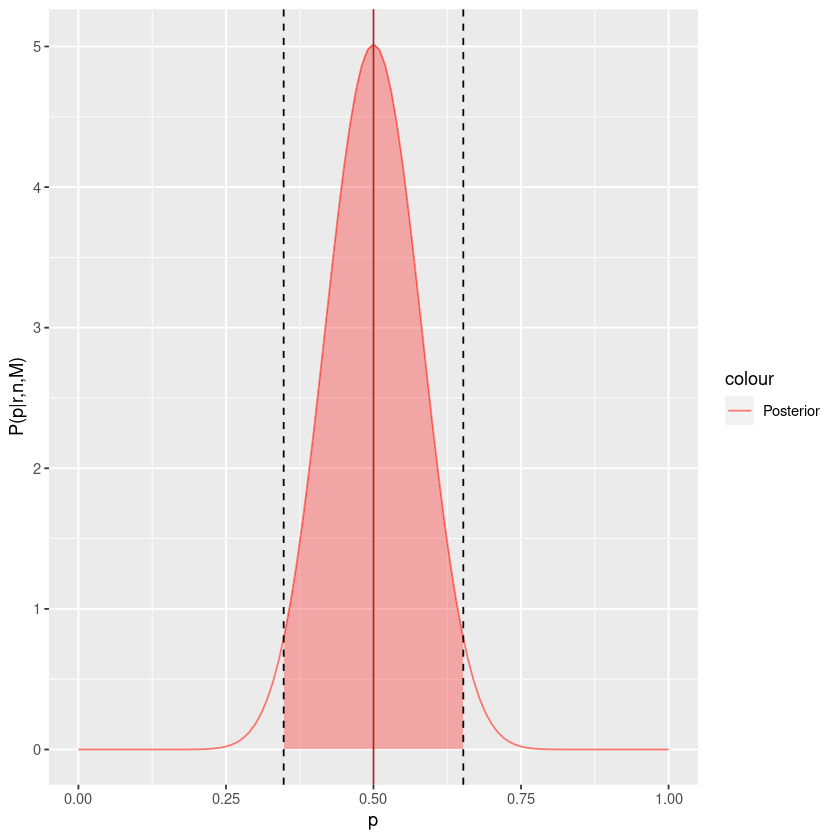

In [59]:
x1 <- qbeta(0.025,r+alpha,n-r+beta)
x2 <- qbeta(0.975,r+alpha,n-r+beta)

plot <- ggplot() + geom_function(fun=dbeta,args=c(r+alpha,n-r+beta),aes(color='Posterior'))
plot <- plot + stat_function(fun=dbeta,args=c(r+alpha,n-r+beta),xlim=c(x1,x2),geom='area',alpha=0.3,fill='red')
plot <- plot + geom_vline(xintercept=x1,linetype='dashed') + geom_vline(xintercept=x2,linetype='dashed') 
plot <- plot + xlim(0,1) + labs(y='P(p|r,n,M)',x="p") + geom_vline(xintercept=p_max(r,n,alpha,beta),color='brown')
plot

c. _Repeat the same analysis assuming a sequential analysis of the data. Show how the most
probable value and the credibility interval change as a function of the number of coin
tosses (i.e. from 1 to 30)._

We will now wrap everything we coded so far in a function, assuming a bet prior, and feed it progressively larger observations.

In [71]:
plot_credibility <- function(x,alpha,beta) {
    # x needs to be a vector of char already
    n <- length(x)
    r <- length(x[x=="H"])
    title <- sprintf("r/n = %s/%s",r,n)

    x1 <- qbeta(0.025,r+alpha,n-r+beta)
    x2 <- qbeta(0.975,r+alpha,n-r+beta)

    plot <- ggplot()+ geom_function(fun=dbeta,args=c(r+alpha,n-r+beta),aes(color='Posterior'))
    plot <- plot + stat_function(fun=dbeta,args=c(r+alpha,n-r+beta),xlim=c(x1,x2),geom='area',alpha=0.3,fill='red')
    plot <- plot + geom_vline(xintercept=x1,linetype='dashed') + geom_vline(xintercept=x2,linetype='dashed') 
    plot <- plot + xlim(0,1) + labs(y='P(p|r,n,M)',x="p",title=title) + geom_vline(xintercept=p_max(r,n,alpha,beta),color='brown')
    print(plot)
    return(c(p_max(r,n,alpha,beta),x1,x2))
}

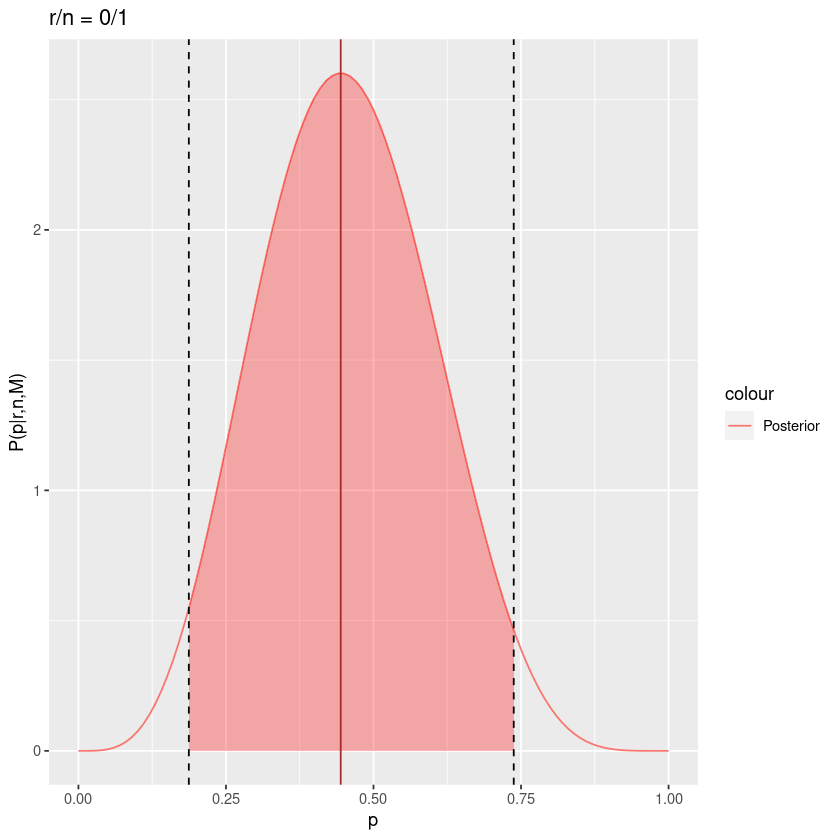

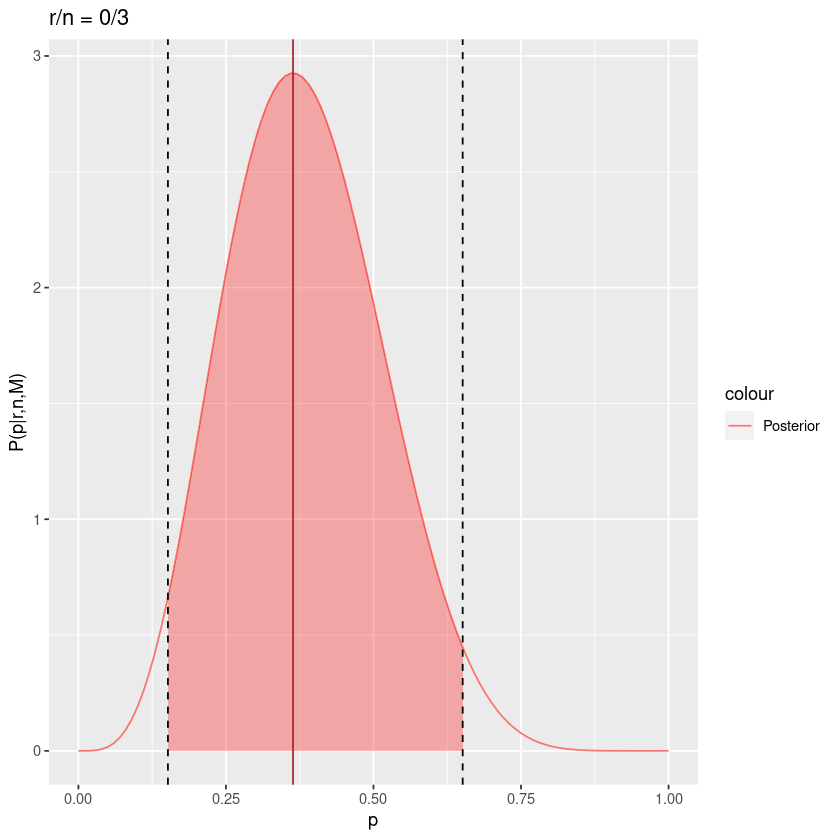

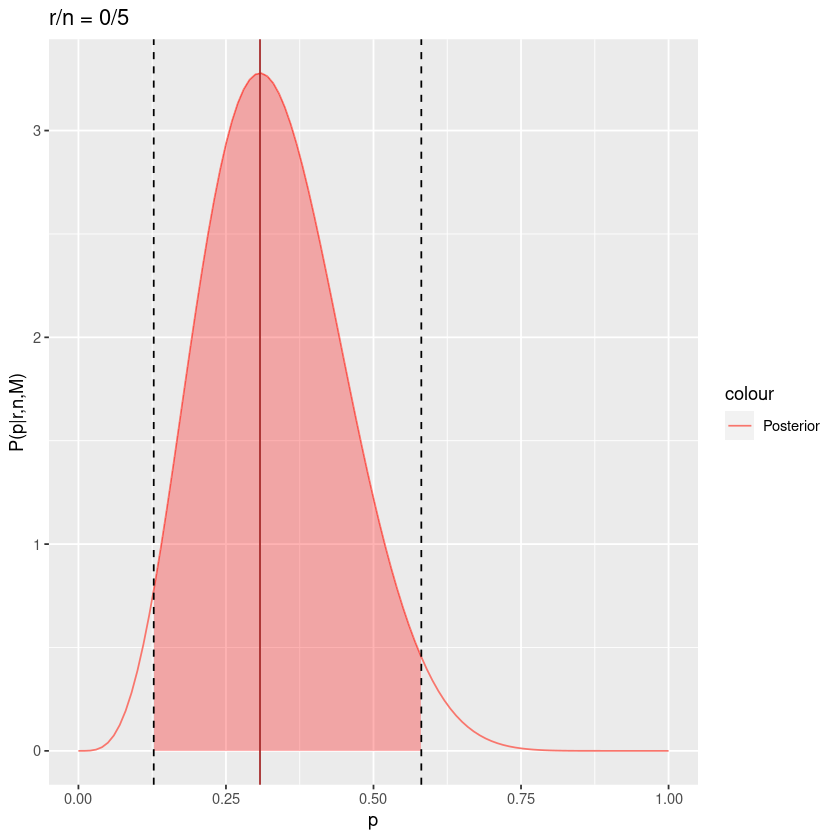

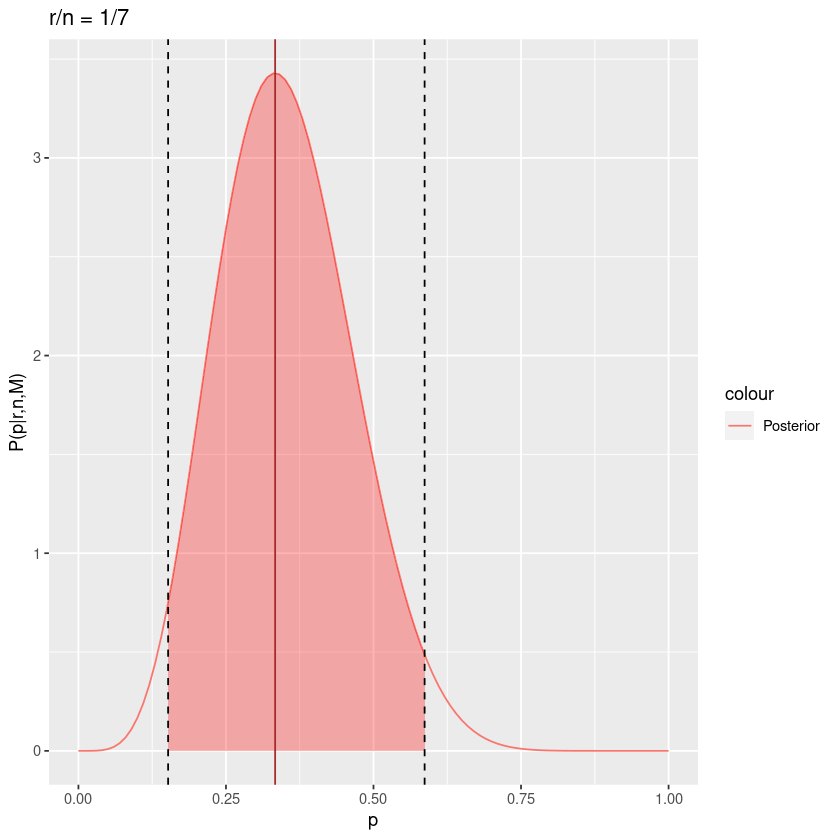

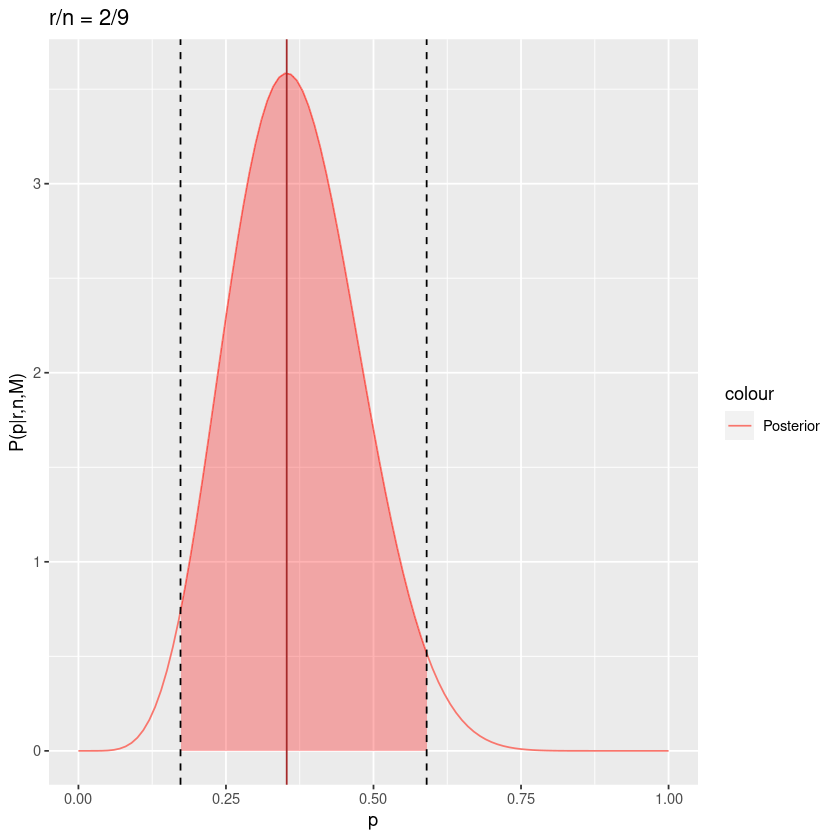

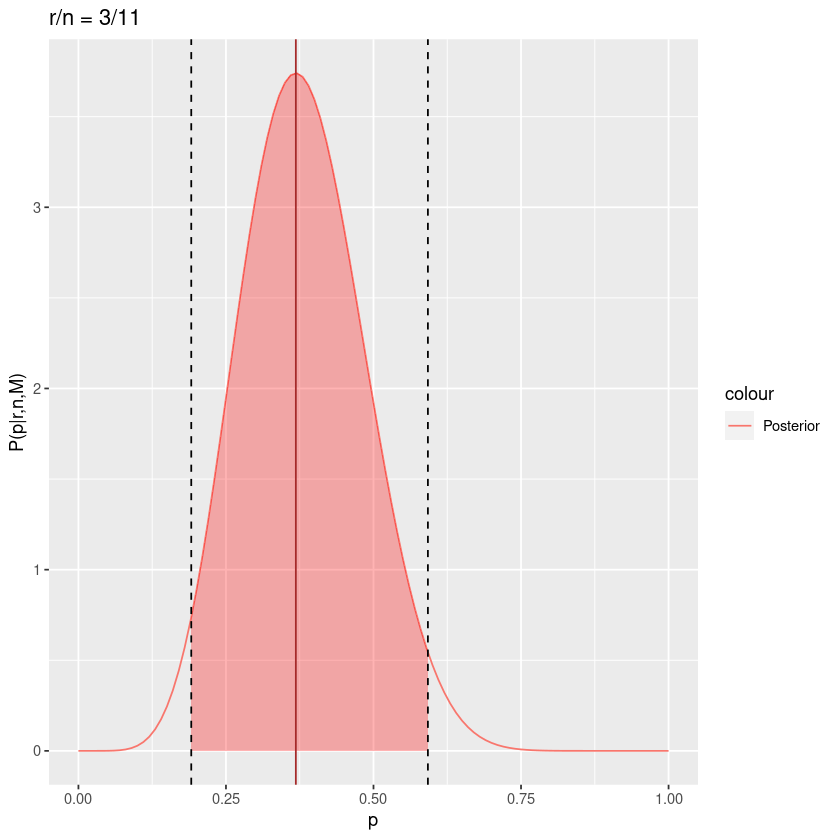

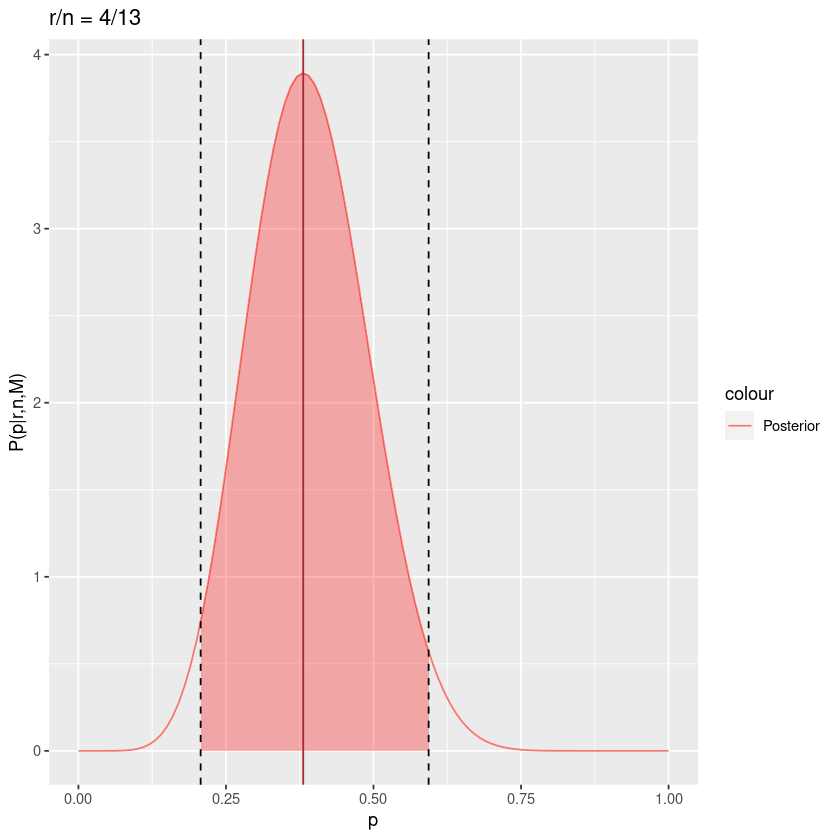

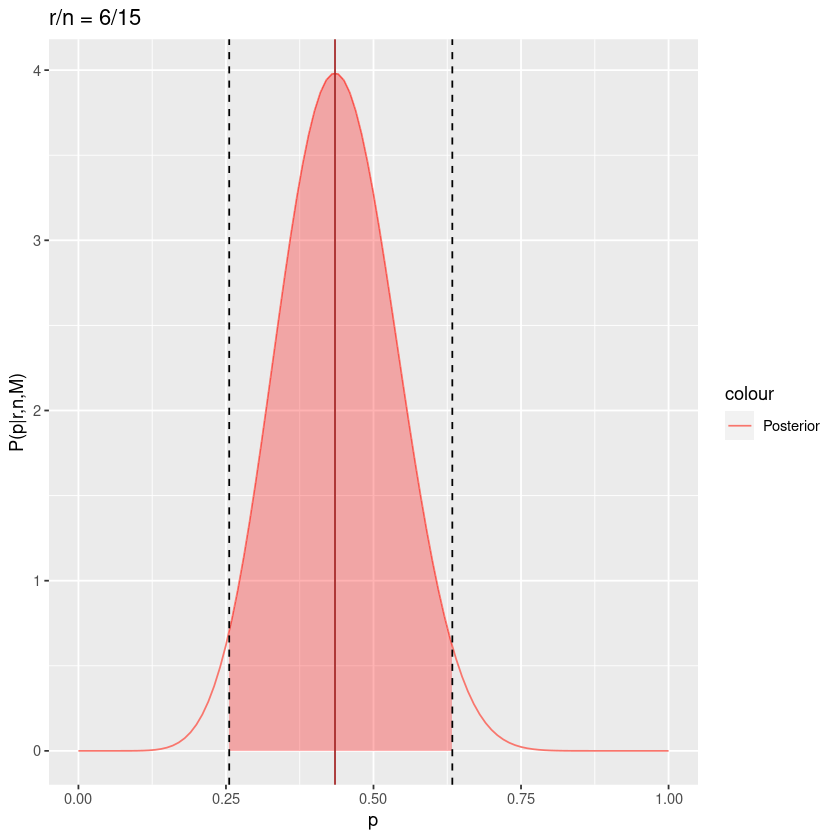

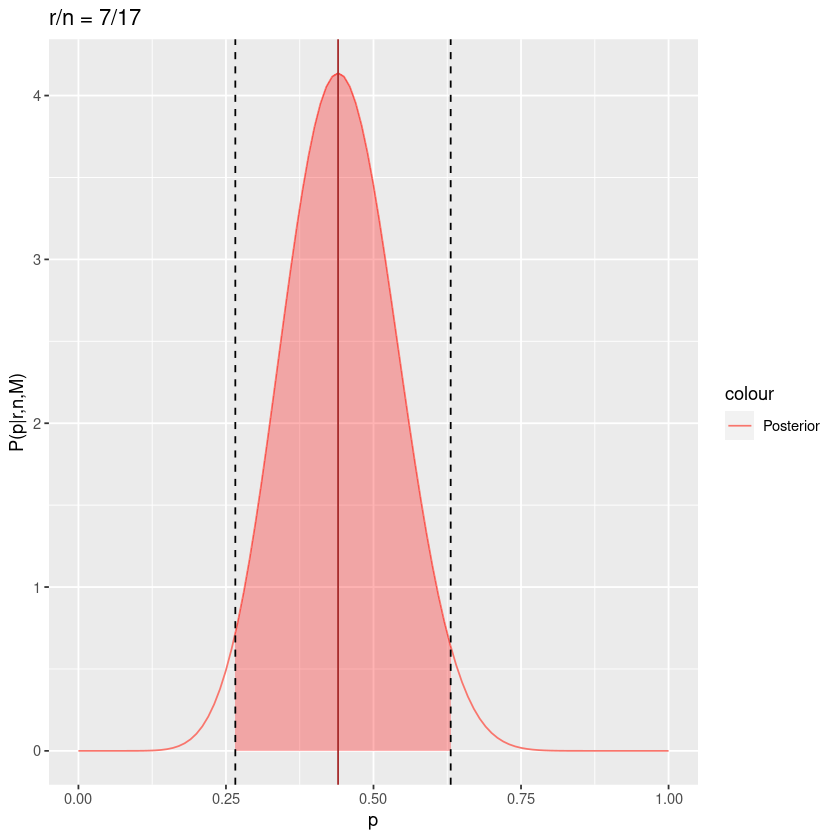

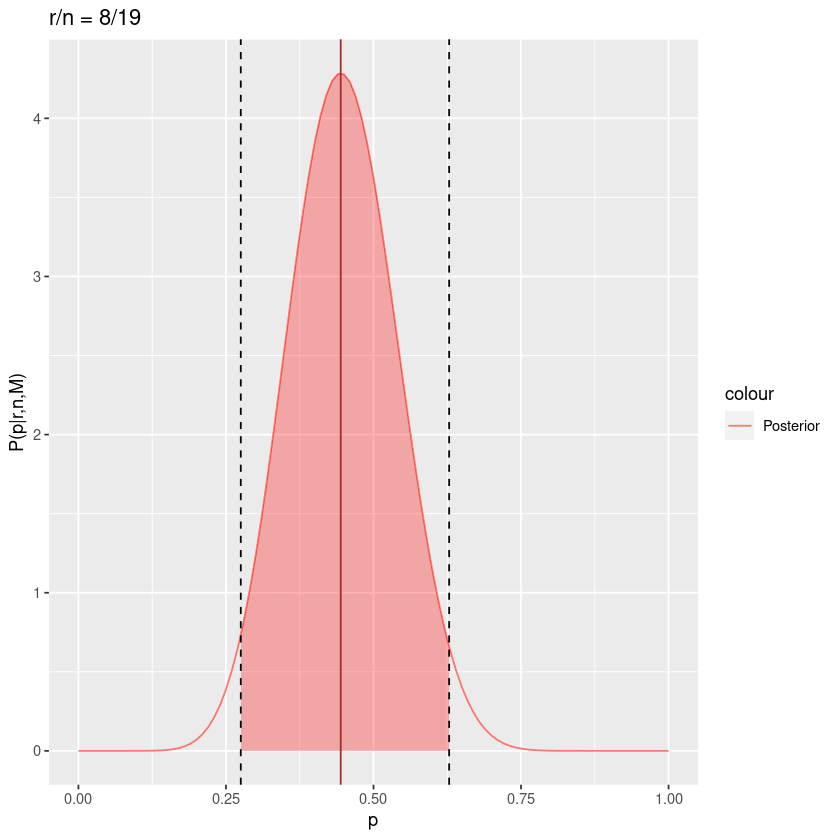

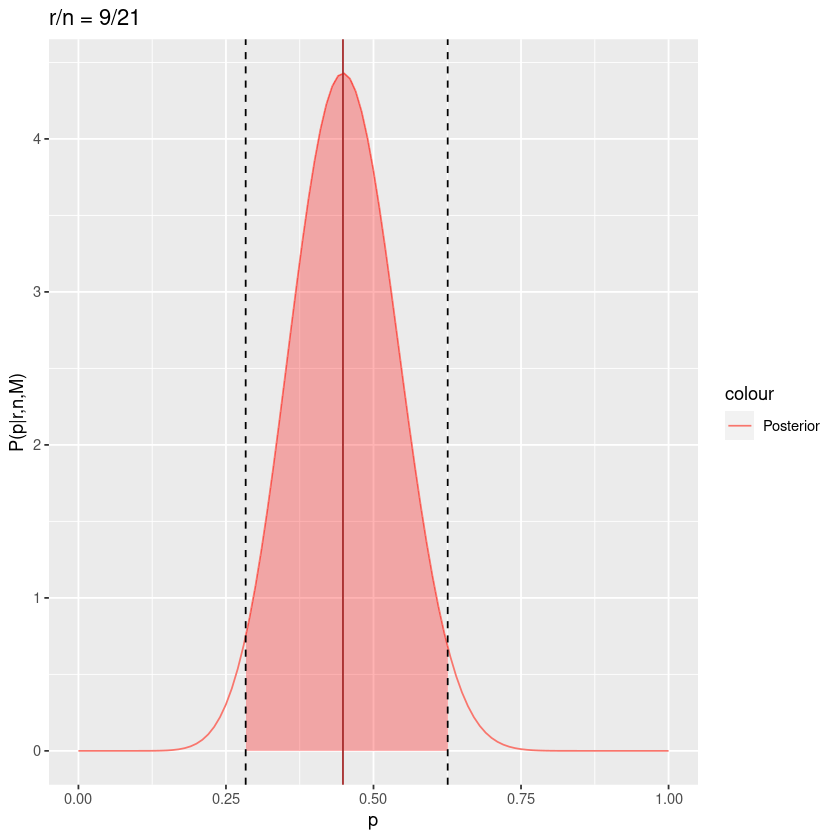

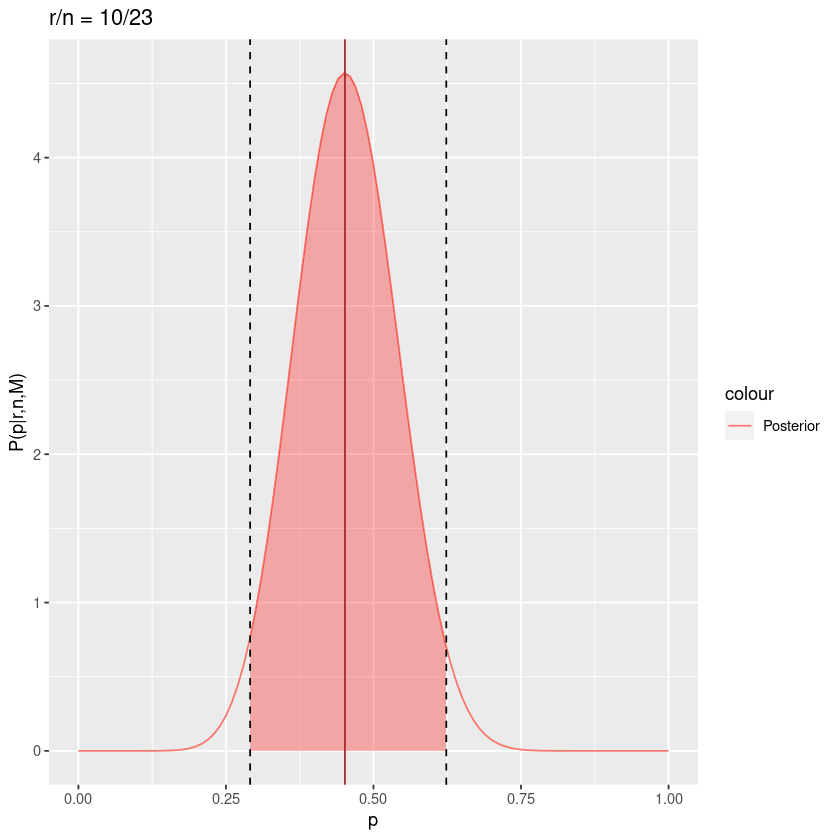

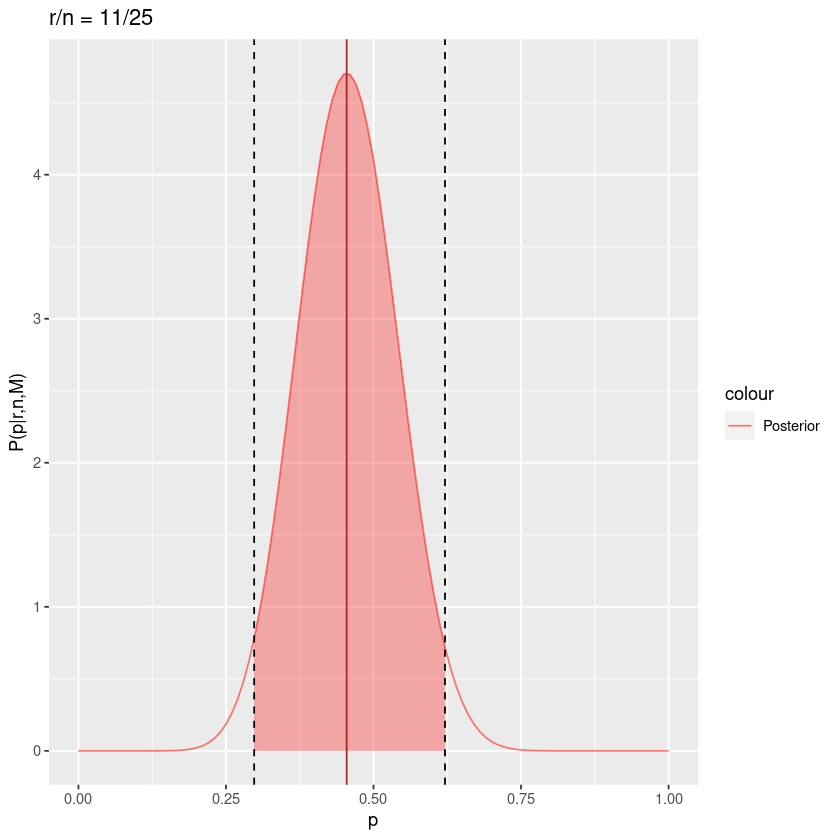

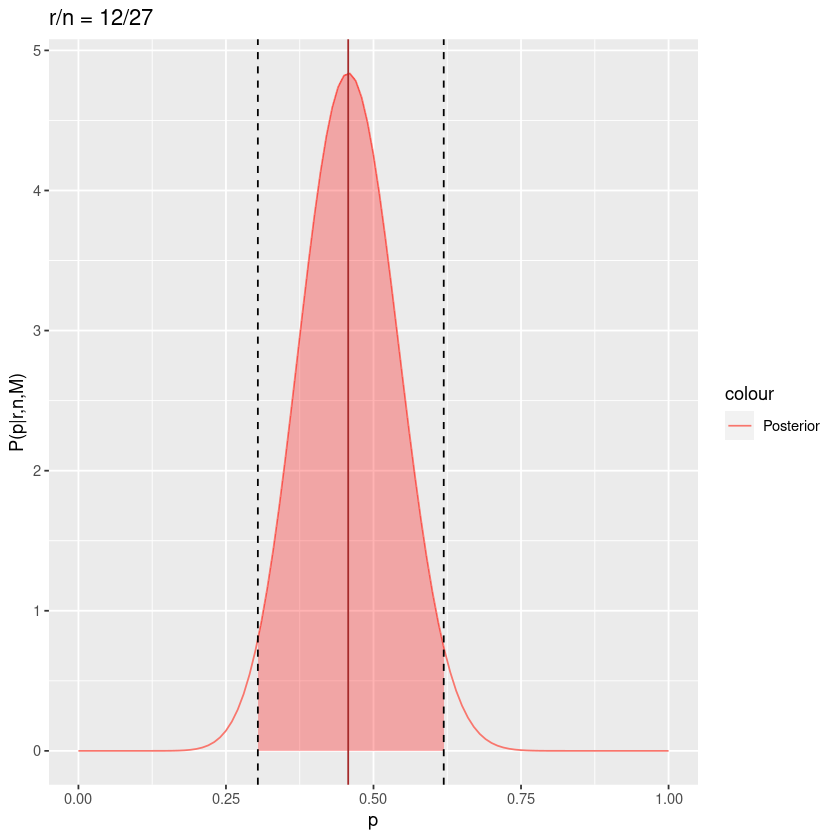

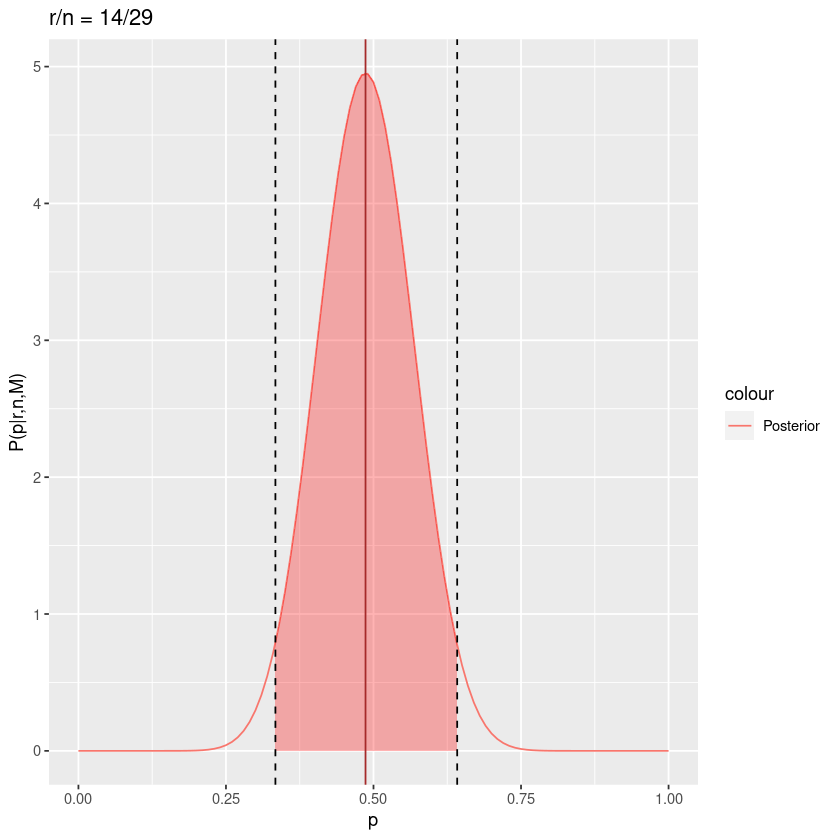

In [85]:
x <- "T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H"
x <- unlist(strsplit(gsub(" ", "", x, fixed = TRUE),","))
 
alpha <- 5
beta <- 5
p_maxes <- c()
x1s <- c()
x2s <- c()

for (i in seq(1,length(x),2)) {
    res <- plot_credibility(x[1:i],alpha,beta)
    p_maxes <- c(p_maxes,res[1])
    x1s <- c(x1s,res[2])
    x2s <- c(x2s,res[3])
}

As we can see, the credibility interval gets narrower as the number of observations grow, while the most probable value for p tends to $0.5$ We can see this better by plotting:

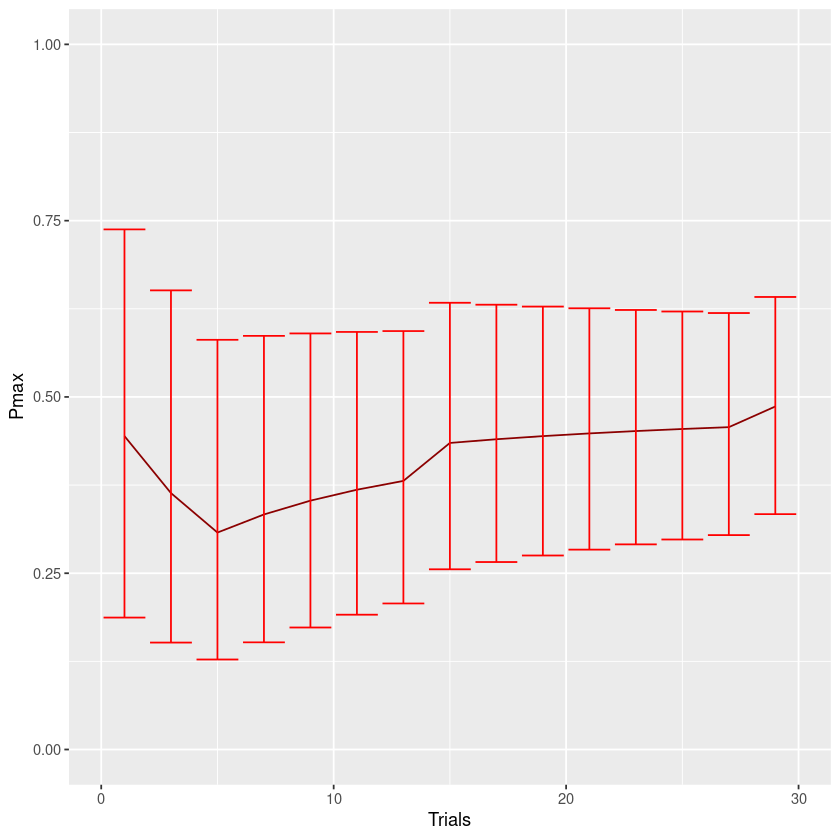

In [98]:
trials <- seq(1,length(x),2)
ress <- data.frame(p_maxes,x1s,x2s,trials)
plot <- ggplot(ress,aes(x=trials,y=p_maxes)) + geom_line(color='darkred') + geom_errorbar(aes(ymin=x1s,ymax=x2s),color='red') + labs(x="Trials",y="Pmax") + ylim(0,1)
plot